In [92]:
import pandas as pd

In [93]:
df_areas = pd.read_csv("bayut_area_guides.csv")
df_areas_info = pd.read_csv("bayut_areas_info.csv")
df_building_info = pd.read_csv("bayut_building_info.csv")

In [94]:
print("shape of areas",df_areas.shape)
print("shape of areas_info",df_areas_info.shape)
print("shape of building_info",df_building_info.shape)


shape of areas (615, 5)
shape of areas_info (615, 21)
shape of building_info (303, 36)


## Areas to be considred

In [95]:
df_areas['sub_location'] = ''
df_areas['location'] = ''
def split_location(text):
    if pd.isna(text):  # Handle NaN values
        return pd.Series({'sub_location': '', 'location': ''})
    if ',' in text:
        sub_loc, loc = text.split(',', 1)  # Split on first comma only
        return pd.Series({'sub_location': sub_loc.strip(), 'location': loc.strip()})
    return pd.Series({'sub_location': '', 'location': text.strip()})

df_areas[['sub_location', 'location']] = df_areas['img_name'].apply(split_location)

In [96]:
locations_buildings_to_consider= ['Dubai Marina', 'Business Bay', 'Jumeirah Lake Towers (JLT)',
       'Discovery Gardens', 'Dubai Investment Park (DIP)','Green Community','Dubai Sports City','International City', 'Sheikh Zayed Road','Dubai Silicon Oasis (DSO)']
df_building_info = df_building_info[df_building_info["area_name"].isin(locations_buildings_to_consider)]

In [97]:
df_building_info.shape

(247, 36)

In [98]:
locations_areas_to_consider = ['Dubai Marina', 'Business Bay', 'Jumeirah Lake Towers (JLT)',
       'Discovery Gardens', 'Dubai Investment Park (DIP)','Green Community','Dubai Sports City','International City', 'Sheikh Zayed Road','Dubai Silicon Oasis (DSO)','Jumeirah Village Circle (JVC)','JVC','Jumeirah Village Circle','DIP','Dubai Investments Park (DIP)','Dubai Silicon Oasis','DSO']
df_areas = df_areas[df_areas["location"].isin(locations_areas_to_consider)]

In [99]:
df_areas.shape

(72, 7)

In [100]:
df_areas['location'].unique()

array(['JVC', 'Jumeirah Village Circle (JVC)', 'Dubai Marina',
       'Dubai Silicon Oasis', 'International City',
       'Jumeirah Village Circle', 'Dubai Sports City',
       'Dubai Investments Park (DIP)', 'Business Bay',
       'Discovery Gardens', 'Green Community', 'Sheikh Zayed Road'],
      dtype=object)

### Correction for JVC name

In [101]:
df_areas.loc[df_areas['location'].isin(["Jumeirah Village Circle","JVC"]), 'location'] = 'Jumeirah Village Circle (JVC)'


In [102]:
len(df_areas['location'].unique())

10

In [103]:
df_areas.head(1)

,page,img_name,img_url,status,url,sub_location,location
1,1,"Mulberry Mansions, JVC",https://assets.bayut.com/content/small_Mulberr...,Ready,/area-guides/mulberry-mansions/,Mulberry Mansions,Jumeirah Village Circle (JVC)


In [104]:
df_areas_info['area'] = df_areas_info['area'].str.strip()
df_areas['img_name'] = df_areas['img_name'].str.strip()

df_areas_info = df_areas_info.merge(
    df_areas[['img_name', 'location', 'sub_location','status']], 
    left_on='area', 
    right_on='img_name', 
    how='right'
)

print("Shape after merge:", df_areas_info.shape)

Shape after merge: (72, 25)


In [105]:
df_areas_info.head(1)

,about-,in-a-nutshell,community-overview,properties-in,transportation-and-parking-spaces,supermarkets-near,mosques-near,other-places-of-worship,schools-near,clinics-and-hospitals-near,...,"outdoor-activities,-fitness-and-beauty",community-events,social-community-groups,things-to-consider,location_x,area,img_name,location_y,sub_location,status
0,Jumeirah Village Circle (JVC) is one of the mo...,A collection of 12 four-bed townhouses\nOffers...,The project of Mulberry Mansions directly face...,The most unique feature of properties in Mulbe...,Mulberry Mansions is conveniently located next...,Supermarkets near Mulberry Mansions that are w...,There are three community mosques near Mulberr...,The nearest place of worship for Christian res...,There are multiple options for elementary as w...,"You will find a multitude of pharmacies, clini...",...,Residents enjoy the following recreational fac...,Jumeirah Village Circle (JVC) is a peaceful re...,If you have pets then you can join a page call...,Mulberry Mansions offer homes with one or two ...,Downtown Dubai is 24 minutes away \nDubai Inte...,"Mulberry Mansions, JVC","Mulberry Mansions, JVC",Jumeirah Village Circle (JVC),Mulberry Mansions,Ready


### saving all filtered data in final

In [106]:
df_building_info.to_csv("final/final_building_info.csv")
df_areas_info.to_csv("final/final_areas_info.csv")

In [25]:
import pandas as pd
from py2neo import Graph, Node, Relationship

In [28]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "1234neo4j"))
graph.run("MATCH (n) DETACH DELETE n")

(No data)

In [30]:
filtered_areas.head(1)

,page,img_name,img_url,status,url,sub_location,location
3,1,"Marina Quays East, Dubai Marina",https://assets.bayut.com/content/small_marina_...,Ready,/area-guides/marina-quays-east/,Marina Quays East,Dubai Marina


In [39]:
df_building_info

,Unnamed: 0,area_name,building_name,url,about,in-a-nutshell,parking,elevators,"security,-central-air-conditioning-and-maintenance-services",gym,...,restaurants-near,supermarkets-near,schools-and-nurseries-near,nearby-buildings,major-landmarks,nearby-attractions,things-to-consider,what-type-of-apartments,what-facilities-are-there,faqs
0,0,Dubai Marina,"Delphine, Dubai Marina",https://www.bayut.com/buildings/delphine-tower/,Delphine Tower is part of a six-building compl...,Type of building: Residential\nLocation: Dubai...,There is parking in Delphine Tower for residen...,There are multiple high-speed elevators in Del...,Delphine Tower has CCTV cameras installed as o...,There is a fully equipped state-of-the-art gym...,...,Restaurants near Delphine Tower Dubai Marina i...,NaN,NaN,Buildings near Delphine Tower Dubai Marina inc...,Major Landmarks near Delphine Tower Dubai Mari...,NaN,Delphine Tower is a complex that redefines lux...,NaN,NaN,NaN
1,1,Dubai Marina,"Marina Plaza, Dubai Marina",https://www.bayut.com/buildings/marina-plaza/,Marina Plaza is located in Dubai Marina and is...,Type of building: Commercial\nLocation: Dubai ...,"The facility of parking in Marina Plaza, Dubai...",Visitors can find multiple high-speed elevator...,NaN,"One can find several gyms near Marina Plaza, D...",...,NaN,NaN,NaN,Buildings near Marina Plaza include:\nMAG 218\...,NaN,NaN,From fitness facilities and security systems t...,NaN,NaN,NaN
2,2,Dubai Marina,"Extreme Waterfront Offices, Dubai Marina",https://www.bayut.com/buildings/extreme-waterf...,Dubai Marina is one of the most sought-after n...,Home to over 200 luxurious residential towers ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"While living in Dubai Marina has its perks, th...",NaN,NaN,NaN
3,3,Dubai Marina,"Gargash Tower, Dubai Marina",https://www.bayut.com/buildings/gargash-tower/,Located along the gleaming water of Dubai Mari...,Type of building: Serviced hotel\nLocation: Du...,There are multiple spaces for parking in Marin...,There are multiple high-speed elevators in Mar...,The advanced security system in this hotel inc...,Guests living in this hotel can have inclusive...,...,Some of the best upscale restaurants in Dubai ...,There are quite a few supermarkets nearby. The...,NaN,There are multiple mixed-use buildings near Ma...,Dubai Marina Walk located near Marina Hotel Ap...,NaN,Guests who stay at Marina Hotel Apartments can...,NaN,NaN,NaN
4,4,Dubai Marina,"Zumurud Tower, Dubai Marina",https://www.bayut.com/buildings/zumurud-tower/,Zumurud Tower is located in Dubai Marina. It i...,Freehold building\nLocated in Dubai Marina\n31...,"Parking in Zumurud Tower, Dubai Marina is quit...",There are five high-speed elevators in Zumurud...,"Security staff monitors Zumurud Tower, Marina ...",Different fitness facilities are available in ...,...,There are many restaurants near Zumurud Tower ...,Supermarkets near Zumurud Tower include:\nSpin...,NaN,NaN,Key landmarks near Zumurud Tower include:\nDub...,NaN,Zumurud Tower offers various facilities to its...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,Sheikh Zayed Road,"Al Manara Building, Sheikh Zayed Road",https://www.bayut.com/buildings/al-manara-buil...,Though Sheikh Zayed Road is known for its skys...,Type of building: Commercial\nLocation: Sheikh...,There is the facility of underground parking i...,"Despite being a low-rise tower, there are high...",NaN,NaN,...,One can spot many casual dining restaurants ne...,NaN,NaN,West Wharf Tower – Residential Building\nAl Ma...,NaN,NaN,Though Al Manara Building Sheikh Zayed Road ha...,NaN,NaN,NaN
299,299,Sheikh Zayed Road,"Eiffel 2 Building, Sheikh Zayed Road",https://www.bayut.com/buildings/eiffel-2/,Eiffel 2 is a low-rise commercial building tha...,Type of building: Commercial\nLocation: Sheikh...,Street parking located outside of Eiffel 2\nTh...,"There is an elevator in Eiffel 2 Building, Dub...",NaN,Individuals can find multiple fitness c

In [36]:
from py2neo import Graph, Node, Relationship


def create_area_nodes():
    for _, row in df_areas_info.iterrows():
        # Create Area node with essential information
        area_node = Node("Area",
                        name=row['area'],
                        location=row['location'],
                        about=row['about-'],
                        overview=row['community-overview'],
                        transportation=row['transportation-and-parking-spaces'])
        
        # Add amenities as separate nodes with relationships
        if pd.notna(row['supermarkets-near']):
            amenity_node = Node("Amenity", 
                              type="Supermarket",
                              details=row['supermarkets-near'])
            graph.create(amenity_node)
            graph.create(Relationship(area_node, "HAS_AMENITY", amenity_node))
        
        if pd.notna(row['schools-near']):
            amenity_node = Node("Amenity",
                              type="School",
                              details=row['schools-near'])
            graph.create(amenity_node)
            graph.create(Relationship(area_node, "HAS_AMENITY", amenity_node))
        
        graph.create(area_node)

def create_building_nodes():
    for _, row in df_building_info.iterrows():
        # Create Building node with essential information
        building_node = Node("Building",
                           name=row['building_name'],
                           area_name=row['area_name'],
                           about=row['about'],
                           nutshell=row['in-a-nutshell'],
                           parking=row['parking'],
                           elevators=row['elevators'])
        
        # Add facilities as properties
        if pd.notna(row['gym']):
            building_node['has_gym'] = True
            building_node['gym_details'] = row['gym']
            
        if pd.notna(row['parking']):
            building_node['has_parking'] = True
            building_node['parking_details'] = row['parking']
            
        graph.create(building_node)
        
        # Create relationship with Area
        query = """
        MATCH (b:Building {name: $building_name})
        MATCH (a:Area {name: $area_name})
        CREATE (b)-[:LOCATED_IN]->(a)
        """
        graph.run(query, building_name=row['building_name'], 
                        area_name=row['area_name'])

# Create nodes and relationships
create_area_nodes()
create_building_nodes()

# Verify creation
print("Areas created:", graph.run("MATCH (a:Area) RETURN count(a)").evaluate())
print("Buildings created:", graph.run("MATCH (b:Building) RETURN count(b)").evaluate())
print("Amenities created:", graph.run("MATCH (am:Amenity) RETURN count(am)").evaluate())

Areas created: 615
Buildings created: 303
Amenities created: 416


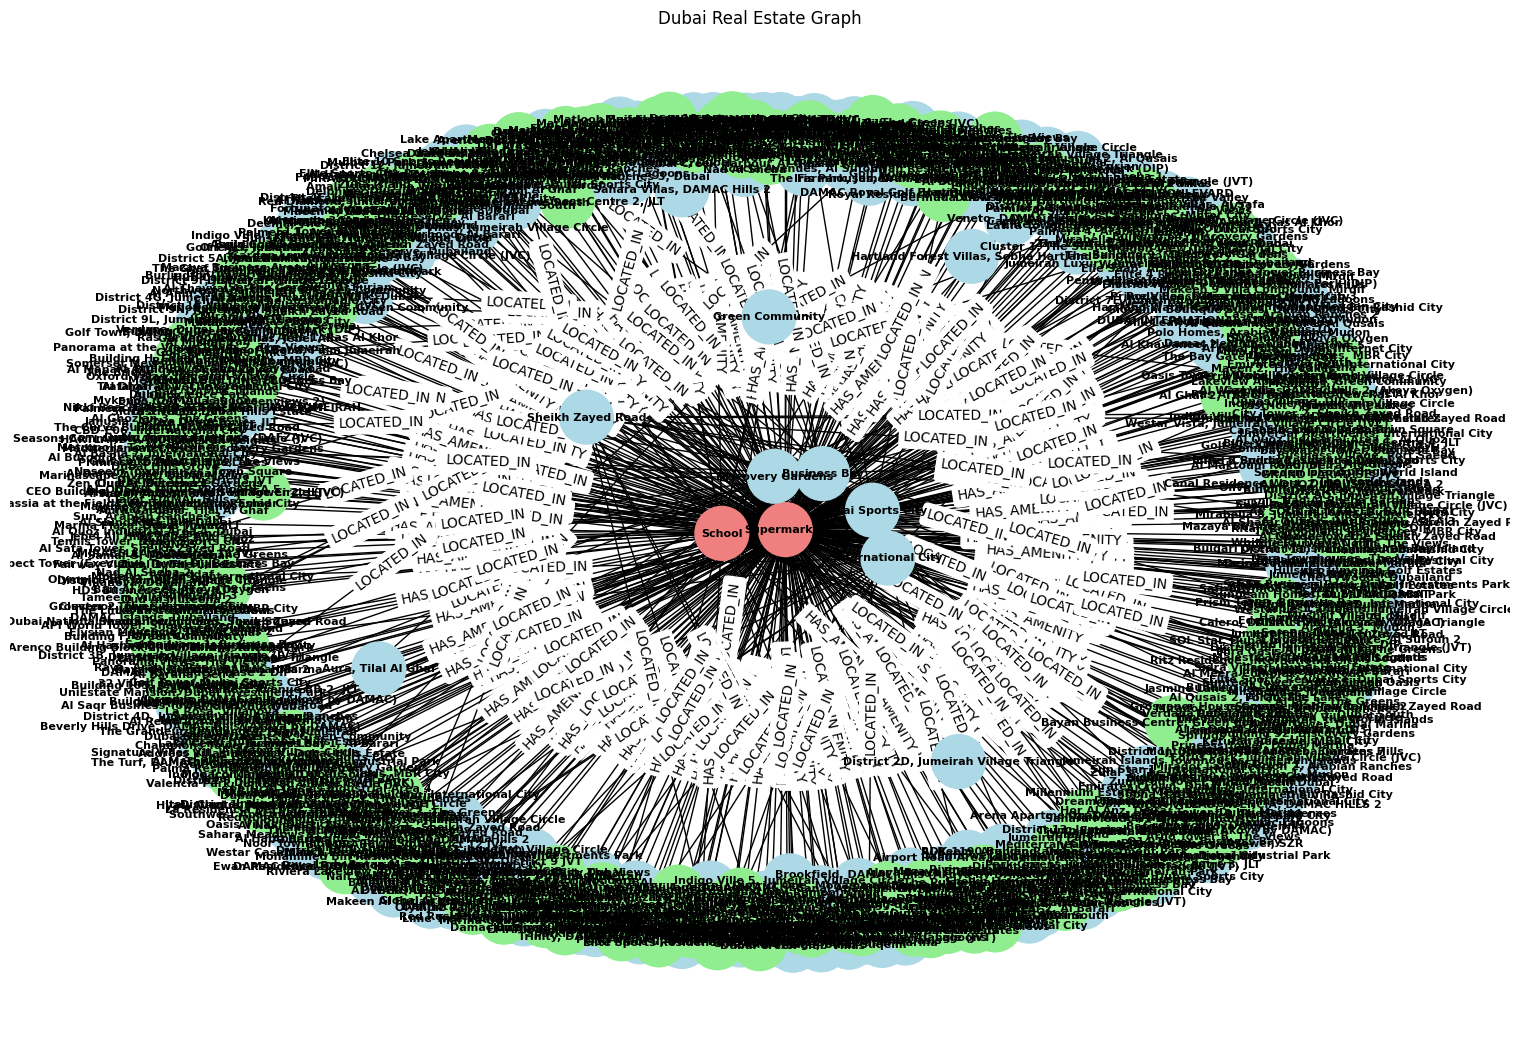


Graph Statistics:
Number of nodes: 918
Number of edges: 579

Node types:
Amenity: 2
Area: 613
Building: 303


In [38]:
# Create NetworkX graph
G = nx.Graph()

# Get nodes and relationships from Neo4j
nodes = graph.run("""
    MATCH (n) 
    RETURN n, labels(n) as labels
""").data()

relationships = graph.run("""
    MATCH (a)-[r]->(b) 
    RETURN 
        COALESCE(a.name, a.type, id(a)) as a_id,
        COALESCE(b.name, b.type, id(b)) as b_id,
        type(r) as relationship_type
""").data()

# Add nodes with error handling
for node in nodes:
    # Get a unique identifier for the node
    node_data = node['n']
    node_labels = node['labels']
    
    # Use name if available, otherwise use type or ID
    node_id = node_data.get('name', node_data.get('type', str(node_data.identity)))
    
    # Add node with its properties
    G.add_node(node_id, 
               label=node_labels[0] if node_labels else 'Unknown',
               **{k: v for k, v in node_data.items() if v is not None})

# Add edges
for rel in relationships:
    G.add_edge(rel['a_id'], rel['b_id'], label=rel['relationship_type'])

# Create the visualization
plt.figure(figsize=(15, 10))

# Use different colors for different node types
color_map = []
for node in G.nodes():
    if G.nodes[node].get('label') == 'Area':
        color_map.append('lightblue')
    elif G.nodes[node].get('label') == 'Building':
        color_map.append('lightgreen')
    else:
        color_map.append('lightcoral')

# Position nodes using spring layout
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw nodes
nx.draw(G, pos, 
        with_labels=True, 
        node_color=color_map,
        node_size=1500, 
        font_size=8,
        font_weight='bold')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Dubai Real Estate Graph")
plt.show()

# Print some statistics
print("\nGraph Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nNode types:")
node_types = {}
for node in G.nodes(data=True):
    label = node[1].get('label', 'Unknown')
    node_types[label] = node_types.get(label, 0) + 1
for label, count in node_types.items():
    print(f"{label}: {count}")